In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras import callbacks


TensorFlow version: 2.2.0


In [2]:
xTemp = np.zeros((636, 6, 340, 444))
with open("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\DetectionDatasetFinal\\TrainingB_1060-1696.npy", 'rb') as f1:
        xTemp = np.load(f1)

In [3]:
validation = np.zeros((212, 6, 340, 444))
with open("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\DetectionDatasetFinal\\Validation_1908-2120.npy", 'rb') as f1:
        validation = np.load(f1)

In [4]:
yTemp = np.zeros((636))
for i in range (636):
    if (i%2==0):
        yTemp[i] = 0
    else:
        yTemp[i] = 1

In [5]:
yValidation = np.zeros((212))
for i in range (212):
    if (i%2==0):
        yValidation[i] = 0
    else:
        yValidation[i] = 1

In [6]:
x = np.zeros((848, 6, 340, 444))
y = np.zeros((848))

permutations = np.random.permutation(848)
for i in range (848):
    if (permutations[i] < 636):
        x[i] = xTemp[permutations[i]]
        y[i] = yTemp[permutations[i]]
    else: 
        x[i] = validation[permutations[i]-636]
        y[i] = yValidation[permutations[i]-636]

In [7]:
x = np.reshape(x, (848, 340, 444, 6))

In [8]:
y = y.astype(int)

In [9]:
img_shape = (340, 444, 6)

In [10]:
unitsChoices = [16, 32, 64, 128, 256]
poolSizes = [3, 5]
batchSizes = [4, 8, 16, 32]
nbEpochs = [7, 8, 9]
learnRates = [1e-3, 1e-4, 1e-5]

In [11]:
img = layers.Input(shape=img_shape)

bn1 = layers.BatchNormalization()(img)
conv1 = layers.Conv2D(unitsChoices[0], (poolSizes[1], poolSizes[1]), padding='same', activation='relu', strides=5)(bn1)
maxPooling1 = layers.MaxPooling2D(padding='same')(conv1)

bn2 = layers.BatchNormalization()(maxPooling1)
conv2 = layers.Conv2D(unitsChoices[3], (poolSizes[1], poolSizes[1]), padding='same', activation='elu', strides=3)(bn2)
maxPooling2 = layers.MaxPooling2D(padding='same')(conv2)

bn3 = layers.BatchNormalization()(maxPooling2)
conv3 = layers.Conv2D(unitsChoices[1], (poolSizes[0], poolSizes[0]), padding='same', activation='elu', strides=3)(bn3)
maxPooling3 = layers.MaxPooling2D(padding='same')(conv3)

bn4 = layers.BatchNormalization()(maxPooling3)
conv4 = layers.Conv2D(unitsChoices[0], (poolSizes[1], poolSizes[1]), padding='same', activation='elu', strides=3)(bn4)

flatten = layers.Flatten()(conv4)

dense1 = layers.Dense(unitsChoices[1], activation = "relu")(flatten)
drop = layers.Dropout(0.3593679575835619)(dense1)
res = layers.Dense(1, activation='sigmoid')(drop)

model = Model(img, res)
opt = tf.keras.optimizers.Adam(learning_rate=learnRates[1])
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.load_weights("Model1TrainingA-HO-V3.hdf5")

In [13]:
history = model.fit(x, y, batch_size = batchSizes[2], epochs = nbEpochs[1])

Epoch 1/8
53/53 [==============================] - 34s 641ms/step - loss: 0.4607 - accuracy: 0.7842
Epoch 2/8
53/53 [==============================] - 34s 634ms/step - loss: 0.3724 - accuracy: 0.8432
Epoch 3/8
53/53 [==============================] - 34s 637ms/step - loss: 0.3034 - accuracy: 0.8915
Epoch 4/8
53/53 [==============================] - 34s 633ms/step - loss: 0.2620 - accuracy: 0.9080
Epoch 5/8
53/53 [==============================] - 34s 636ms/step - loss: 0.2087 - accuracy: 0.9458
Epoch 6/8
53/53 [==============================] - 34s 636ms/step - loss: 0.1717 - accuracy: 0.9670
Epoch 7/8
53/53 [==============================] - 34s 647ms/step - loss: 0.1347 - accuracy: 0.9752
Epoch 8/8
53/53 [==============================] - 33s 628ms/step - loss: 0.1039 - accuracy: 0.9906


In [14]:
model.save_weights("Model1TrainingB-HO-V3.hdf5")

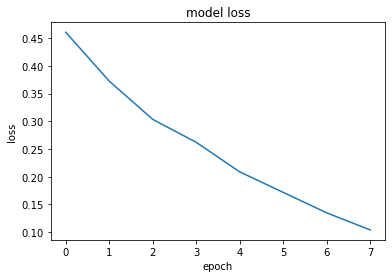

In [17]:
from matplotlib import pyplot as plt
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])

In [18]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 340, 444, 6)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 340, 444, 6)       24        
_________________________________________________________________
conv2d (Conv2D)              (None, 68, 89, 16)        2416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 45, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 45, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 15, 128)       51328     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 8, 128)         0     